In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader.TrainValLoader import train_val_loader
from loader.CSVLoader import csv_loader

gt,wave = csv_loader()
all_data = train_val_loader()

In [3]:
import numpy as np
from prep.BM3DBlock import bm3d_block
from prep.WaveletBlock import wavelet_transform
from prep.ContinuumRemovalBlock import continuum_removal
from prep.GaussianBlock import gaussian_block
from prep.ResizeBlock import make_resize_block
from prep.HelperBlocks import pipe
from prep.PCABlock import pca_block
from prep.SpectralIndexes import calc_indexes
from prep.SmoothDerivativeBlock import savgol_block


transform_bm3d = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    lambda d: bm3d_block(d,psd=1,final_layers=10),
    lambda d: np.ma.filled(d,0)
])

transform_cr = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    continuum_removal,
    lambda d: np.ma.filled(d,0)
])

transform_gauss = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    gaussian_block,
    lambda d: np.ma.filled(d,0)
])

transform_msc_snv = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    lambda d: np.ma.filled(d,0)
]) # MSC and SNV needs to work separately on Validation Dataset

transform_pca = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    lambda d: pca_block(d,1),
    lambda d: np.ma.filled(d,0)
])

transform_sg = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    lambda d: savgol_block(d,5,2,1,2),
    lambda d: np.ma.filled(d,0)
])

transform_spectral = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    calc_indexes
])

transform_wave = lambda d, is_test: pipe(d,[
    make_resize_block(10, pre_fill=0, order=0),
    lambda d: wavelet_transform(d,"dmey",result_wave_count=210),
    lambda d: np.ma.filled(d,0)
])

In [4]:


from prep.ContinuumRemovalBlock import continuum_removal1d
from prep.GaussianBlock import gaussian_block1d
from prep.ReducerBlocks import mean_1d_block, median_1d_block, quantiles_block
from prep.SmoothDerivativeBlock import savgol_block1d
from prep.WaveletBlock import wavelet_transform1d


transform_cr_1d = lambda d, is_test: pipe(d,[
    mean_1d_block,
    continuum_removal1d,
])

transform_gauss_1d = lambda d, is_test: pipe(d,[
    mean_1d_block,
    gaussian_block1d,
])

transform_msc_snv_1d = lambda d, is_test: pipe(d,[
    mean_1d_block
]) # MSC and SNV needs to work separately on Validation Dataset

transform_sg_1d = lambda d, is_test: pipe(d,[
    mean_1d_block,
    lambda d: savgol_block1d(d,5,2,1,2)
])

transform_wave_1d = lambda d, is_test: pipe(d,[
    mean_1d_block,
    lambda d: wavelet_transform1d(d,"dmey",result_wave_count=210)
])

transform_median = lambda d, is_test: pipe(d,[
    median_1d_block
])

transform_quantiles = lambda d, is_test: pipe(d,[
    quantiles_block
])

In [15]:
x = transform_cr_1d(all_data,False)

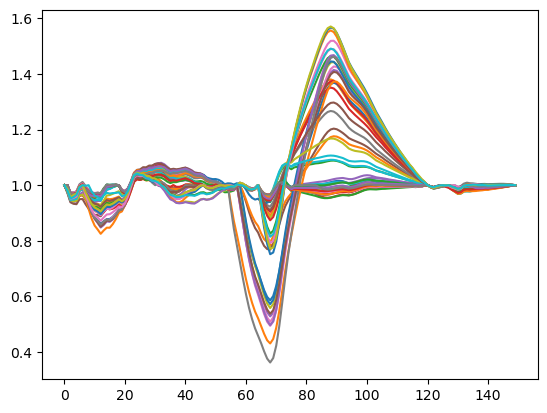

In [23]:
import matplotlib.pyplot as plt
for y in range(50):
    plt.plot(x[y])

In [2]:
from loader.TestLoader import test_loader


all_data_test = test_loader()
transformed = transform_sg_1d(all_data,False)
transformed_test = transform_sg_1d(all_data_test,True)


NameError: name 'all_data' is not defined

In [ ]:
np.save("./experiment2/wave_1d",transformed)
np.save("./experiment2/wave_1d_test",transformed_test)